In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.environ['PATH_TO_ENV'] = "~/projects/chatsky-llm-autoconfig/.env"

In [3]:
from dialogue2graph.datasets.complex_dialogues.generation import LoopedGraphGenerator

/home/peshkichev/miniconda3/envs/py311/lib/python3.11/site-packages/pydantic/_internal/_fields.py:192: UserWarning: Field name "validate" in "Dialogue" shadows an attribute in parent "DialogueBase"
  warnings.warn(


In [4]:
from dialogue2graph.pipelines.core.graph import Graph
from dialogue2graph.pipelines.core.dialogue_sampling import RecursiveDialogueSampler
from dialogue2graph.datasets.complex_dialogues.prompts import graph_example

In [5]:
sampler = RecursiveDialogueSampler()

In [6]:
dias = sampler.invoke(Graph(graph_example),5)

ENDS:  [9]
NODES:  [[1, 2, 5, 10, 11, 6, 7, 9], [1, 5, 10, 11, 6, 7, 9], [1, 2, 5, 7, 9], [1, 3, 8, 9], [1, 4, 8, 9], [1, 5, 7, 9]]
REM:  [[1, 5, 10, 11, 6, 7, 9], [1, 2, 5, 7, 9], [1, 3, 8, 9], [1, 4, 8, 9]]
Graph has all the dialogues


In [7]:
from settings import EnvSettings
env_settings = EnvSettings()

In [8]:
from langchain.chat_models import ChatOpenAI

In [9]:
generation_model = ChatOpenAI(model="chatgpt-4o-latest", api_key=env_settings.OPENAI_API_KEY, base_url=env_settings.OPENAI_BASE_URL, temperature=1)
theme_validation_model = ChatOpenAI(model="gpt-3.5-turbo", api_key=env_settings.OPENAI_API_KEY, base_url=env_settings.OPENAI_BASE_URL, temperature=0)
validation_model = ChatOpenAI(model="gpt-4o-mini", api_key=env_settings.OPENAI_API_KEY, base_url=env_settings.OPENAI_BASE_URL, temperature=0)

/tmp/ipykernel_3745696/4146588986.py:1: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import ChatOpenAI``.
  generation_model = ChatOpenAI(model="chatgpt-4o-latest", api_key=env_settings.OPENAI_API_KEY, base_url=env_settings.OPENAI_BASE_URL, temperature=1)


In [28]:
generator = LoopedGraphGenerator(generation_model,validation_model, theme_validation_model)

In [30]:
graph = generator.invoke("booking a table")

INFO:dialogue2graph.datasets.complex_dialogues.generation:Generating Graph ...
INFO:dialogue2graph.utils.prompt_caching:Generated UUID: 00000000-0000-0000-0000-00000000002a



Generating graph for topic: booking a table


INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:dialogue2graph.datasets.complex_dialogues.generation:Graph generated is {'edges': [{'source': 1, 'target': 2, 'utterances': ['Hi! I’d like to book a table.', 'Hello! I need to make a reservation.']}, {'source': 2, 'target': 3, 'utterances': ['I need a table for 4 at 7 PM.', 'Can I get a table for two at 8:30?']}, {'source': 3, 'target': 4, 'utterances': ['Yes, book it please.', 'Go ahead and confirm the reservation.']}, {'source': 3, 'target': 8, 'utterances': ['Actually, never mind. I don’t need to book.', 'On second thought, I’ll pass for now.']}, {'source': 4, 'target': 5, 'utterances': ['My name is Alex, and my number is 555-1234.', 'Sure! It’s Jamie, and my phone number is 987-6543.']}, {'source': 5, 'target': 7, 'utterances': ['Thanks! That’s all I needed.', 'No, that’s it. Thanks a lot!']}, {'source': 2, 'target': 6, 'utterances': ['Actually, can I change the 

ENDS:  [7, 8]
NODES:  [[1, 2, 3, 4, 6, 2, 6, 4, 5, 7], [1, 2, 6, 2, 3, 4, 6, 4, 5, 7], [1, 2, 6, 4, 6, 2, 3, 4, 5, 7], [1, 2, 3, 4, 6, 4, 5, 7], [1, 2, 6, 2, 3, 4, 5, 7], [1, 2, 6, 4, 6, 2, 3, 8], [1, 2, 3, 4, 5, 7], [1, 2, 6, 2, 3, 8], [1, 2, 6, 4, 5, 7], [1, 2, 3, 8]]
REM:  [[1, 2, 6, 4, 6, 2, 3, 8], [1, 2, 3, 4, 5, 7]]


INFO:dialogue2graph.datasets.complex_dialogues.generation:Sampled 60 dialogues


Graph has all the dialogues
Graph has all the dialogues


INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:dialogue2graph.datasets.complex_dialogues.generation:Validating and fixing transitions...
INFO:dialogue2graph.datasets.complex_dialogues.generation:Validating initial graph
INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx

Sampling dialogues...
ENDS:  [7, 8]
NODES:  [[1, 2, 3, 4, 6, 4, 5, 7], [1, 2, 3, 4, 5, 7], [1, 2, 6, 4, 5, 7], [1, 2, 3, 8]]
REM:  [[1, 2, 3, 4, 6, 4, 5, 7], [1, 2, 6, 4, 5, 7], [1, 2, 3, 8]]


INFO:dialogue2graph.datasets.complex_dialogues.generation:going to return: {'edges': [{'source': 1, 'target': 2, 'utterances': ['Hi! I’d like to book a table.', 'Hello! I need to make a reservation.']}, {'source': 2, 'target': 3, 'utterances': ['I need a table for 4 at 7 PM.', 'Can I get a table for two at 8:30?']}, {'source': 3, 'target': 4, 'utterances': ['Yes, book it please.', 'Go ahead and confirm the reservation.']}, {'source': 3, 'target': 8, 'utterances': ['Actually, never mind. I don’t need to book.', 'On second thought, I’ll pass for now.']}, {'source': 4, 'target': 5, 'utterances': ['My name is Alex, and my number is 555-1234.', 'Sure! It’s Jamie, and my phone number is 987-6543.']}, {'source': 5, 'target': 7, 'utterances': ['Thanks! That’s all I needed.', 'No, that’s it. Thanks a lot!']}, {'source': 2, 'target': 6, 'utterances': ['Actually, can I change the time?', 'Wait, I need to modify the number of guests.']}, {'source': 4, 'target': 6, 'utterances': ['Wait, I actually 

Graph has all the dialogues
Sampled 64 dialogues
Graph has all the dialogues


In [32]:
graph

[{'graph': {'edges': [{'source': 1,
     'target': 2,
     'utterances': ['Hi! I’d like to book a table.',
      'Hello! I need to make a reservation.']},
    {'source': 2,
     'target': 3,
     'utterances': ['I need a table for 4 at 7 PM.',
      'Can I get a table for two at 8:30?']},
    {'source': 3,
     'target': 4,
     'utterances': ['Yes, book it please.',
      'Go ahead and confirm the reservation.']},
    {'source': 3,
     'target': 8,
     'utterances': ['Actually, never mind. I don’t need to book.',
      'On second thought, I’ll pass for now.']},
    {'source': 4,
     'target': 5,
     'utterances': ['My name is Alex, and my number is 555-1234.',
      'Sure! It’s Jamie, and my phone number is 987-6543.']},
    {'source': 5,
     'target': 7,
     'utterances': ['Thanks! That’s all I needed.',
      'No, that’s it. Thanks a lot!']},
    {'source': 2,
     'target': 6,
     'utterances': ['Actually, can I change the time?',
      'Wait, I need to modify the number of 

In [78]:
graph[0]['graph']

{'edges': [{'source': 1,
   'target': 2,
   'utterances': ['I’d like to book a table for dinner.',
    'Can you help me reserve a table at a restaurant?']},
  {'source': 2,
   'target': 3,
   'utterances': ['Tomorrow at 7 PM.', 'This Saturday at 8 PM.']},
  {'source': 3,
   'target': 4,
   'utterances': ['For four people.', 'A table for two, please.']},
  {'source': 4,
   'target': 8,
   'utterances': ['Somewhere in downtown would be nice.',
    'Anywhere with good Italian food.']},
  {'source': 8,
   'target': 9,
   'utterances': ["Let's go with Italian.", 'Chinese sounds good.']},
  {'source': 9,
   'target': 13,
   'utterances': ['Bella Italia sounds perfect.',
    'I’ll go with Lotus Garden.']},
  {'source': 13,
   'target': 5,
   'utterances': ['Yes, that works.', 'That sounds great.']},
  {'source': 5,
   'target': 10,
   'utterances': ['Yes, that’s correct.', 'Everything looks good.']},
  {'source': 5,
   'target': 6,
   'utterances': ['Actually, can we change the time to 9 PM?'

In [79]:
graph[0]['dialogues'][0]

{'messages': [{'text': 'Hey there! How can I help you today?',
   'participant': 'assistant'},
  {'text': 'I’d like to book a table for dinner.', 'participant': 'user'},
  {'text': 'Sure! What date and time would you like to book the table for?',
   'participant': 'assistant'},
  {'text': 'Tomorrow at 7 PM.', 'participant': 'user'},
  {'text': 'Got it. How many people will be joining?',
   'participant': 'assistant'},
  {'text': 'For four people.', 'participant': 'user'},
  {'text': 'Alright! Do you have a specific location in mind or any preferences?',
   'participant': 'assistant'},
  {'text': 'Somewhere in downtown would be nice.', 'participant': 'user'},
  {'text': 'There are a few great restaurants available. Would you like Italian, Chinese, or something else?',
   'participant': 'assistant'},
  {'text': "Let's go with Italian.", 'participant': 'user'},
  {'text': 'Sure! You could try Bella Italia for Italian, Lotus Garden for Chinese, or Grill House for a steakhouse experience. A

In [34]:
graph_c = Graph(graph[0]['graph'])

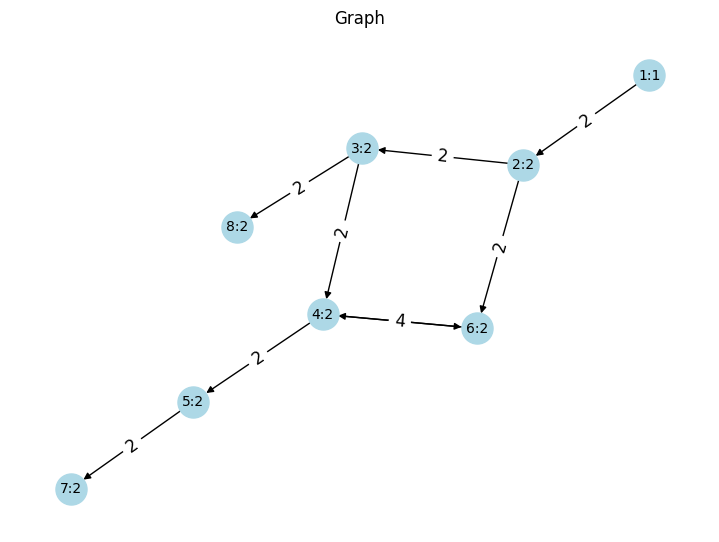

In [35]:
graph_c.visualise_short("Graph")

In [36]:
dias = sampler.invoke(graph_c,5)

ENDS:  [7, 8]
NODES:  [[1, 2, 3, 4, 6, 4, 5, 7], [1, 2, 3, 4, 5, 7], [1, 2, 6, 4, 5, 7], [1, 2, 3, 8]]
REM:  [[1, 2, 3, 4, 6, 4, 5, 7], [1, 2, 6, 4, 5, 7], [1, 2, 3, 8]]
Graph has all the dialogues


In [19]:
dias

[Dialogue(messages=[DialogueMessage(text='Hey there! How can I help you today?', participant='assistant'), DialogueMessage(text="I'd like to book a table for dinner.", participant='user'), DialogueMessage(text='Sure! What kind of restaurant are you looking for? Any specific cuisine or location in mind?', participant='assistant'), DialogueMessage(text="I'm looking for an Italian restaurant in downtown.", participant='user'), DialogueMessage(text='Got it. How many people will it be, and what time are you thinking?', participant='assistant'), DialogueMessage(text='Do they have anything a bit later?', participant='user'), DialogueMessage(text="That time isn't available. I can book you in an hour later, or I can check for another place. What do you prefer?", participant='assistant'), DialogueMessage(text="Let's do the later time.", participant='user'), DialogueMessage(text='Looks like they have a table available at that time. Want me to book it for you?', participant='assistant'), DialogueM

In [10]:
from three_stages_0 import ThreeStagesGraphGenerator

In [38]:
generator = ThreeStagesGraphGenerator()

In [39]:
res_graph = generator.invoke(dias, temp=1)

LLM


INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: BAAI/bge-m3


NODES:  {'nodes': [{'id': 1, 'label': 'start', 'is_start': True, 'utterances': ['Hey there! How can I help you today?']}, {'id': 2, 'label': 'ask_reservation_details', 'is_start': False, 'utterances': ['Of course! How many guests and what time do you need the reservation for?', 'Sure! What time and for how many people?']}, {'id': 3, 'label': 'confirm_availability', 'is_start': False, 'utterances': ['I can get you a table for that time. Would you like to confirm the booking?', 'That time is available! Should I go ahead and book it for you?']}, {'id': 4, 'label': 'ask_contact_details', 'is_start': False, 'utterances': ['Got it! Can I have your name and a contact number for the reservation?', 'Great! I just need your name and phone number to finalize the booking.']}, {'id': 5, 'label': 'ask_modification', 'is_start': False, 'utterances': ['No problem! What would you like to change?', 'Sure thing! What details do you want to modify?']}, {'id': 6, 'label': 'confirm_booking', 'is_start': Fal

In [26]:
res_graph = generator.invoke(dias, model_name="gpt-4o-2024-11-20", temp=0)

LLM


INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: BAAI/bge-m3


NODES:  {'nodes': [{'id': 1, 'label': 'start', 'is_start': True, 'utterances': ['Hello! How can I help you?']}, {'id': 2, 'label': 'recommend_restaurants', 'is_start': False, 'utterances': ['Try curry prince or pizza hut fen ditton', 'I was able to find three options in your price range, may I recommend The Gandhi?', 'There are a number of options for Indian restaurants in the centre of town. What price range would you like?', 'I found five expensive restaurants on the south side of town. Would you prefer Chinese, Indian, Italian or Mexican?', 'I have found many possibilities. Golden house is chinese and the river bar steakhouse and grill serves modern european. Are either of those of interest for you?']}, {'id': 3, 'label': 'specific_recommendation', 'is_start': False, 'utterances': ['Pizza hut fen ditton serves italian food in the east, would you like a reservation?', 'Pizza hut fen ditton is the only Italian restaurant, in the east, in the moderate price range. Do you want me to try

In [16]:
res_graph_2 = generator.invoke(dias, model_name="o1-mini", temp=1)

LLM


INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: BAAI/bge-m3


NODES:  {'nodes': [{'id': 1, 'label': 'start', 'is_start': True, 'utterances': ['Hello! How can I help you?']}, {'id': 2, 'label': 'provide_initial_options', 'is_start': False, 'utterances': ['Try curry prince or pizza hut fen ditton', 'I was able to find three options in your price range, may I recommend The Gandhi?', 'There are a number of options for Indian restaurants in the centre of town. What price range would you like?', 'I have found many possibilities. Golden house is chinese and the river bar steakhouse and grill serves modern european. Are either of those of interest for you?', 'I was able to find three options in your price range, may I recommend The Gandhi?', 'I have found many possibilities. Golden house is chinese and the river bar steakhouse and grill serves modern european. Are either of those of interest for you?', 'I found five expensive restaurants on the south side of town. Would you prefer Chinese, Indian, Italian or Mexican?', 'I was able to find three options i

In [17]:
graph_example

{'edges': [{'source': 1,
   'target': 2,
   'utterances': ["I'm looking for an Indian restaurant, preferably in the centre of town."]},
  {'source': 2,
   'target': 5,
   'utterances': ['I would prefer cheap restaurants.']},
  {'source': 5,
   'target': 7,
   'utterances': ['Sure please book a table there fore 7 people at 12:15 on saturday']},
  {'source': 1,
   'target': 5,
   'utterances': ['I am looking for a restaurant. The restaurant should be in the moderate price range and should be in the east']},
  {'source': 5,
   'target': 10,
   'utterances': ['The restaurant should serve italian food.']},
  {'source': 6,
   'target': 7,
   'utterances': ['I will have 5 people and we would like 12:15 if possible. Thanks.']},
  {'source': 7,
   'target': 9,
   'utterances': ["No that's all I needed. Thank you!",
    'Thanks for you help. I only need the restaurant reservation. Goodbye.']},
  {'source': 10,
   'target': 11,
   'utterances': ['What other restaurants in that area serve Italian 

In [86]:
res_graph.graph_dict

{'nodes': [{'id': 1,
   'label': 'start',
   'is_start': True,
   'utterances': ['Hey there! How can I help you today?']},
  {'id': 2,
   'label': 'ask_date_time',
   'is_start': False,
   'utterances': ['Sure! What date and time would you like to book the table for?']},
  {'id': 3,
   'label': 'ask_party_size',
   'is_start': False,
   'utterances': ['Got it. How many people will be joining?']},
  {'id': 4,
   'label': 'ask_location',
   'is_start': False,
   'utterances': ['Alright! Do you have a specific location in mind or any preferences?']},
  {'id': 5,
   'label': 'ask_cuisine',
   'is_start': False,
   'utterances': ['There are a few great restaurants available. Would you like Italian, Chinese, or something else?']},
  {'id': 6,
   'label': 'suggest_restaurants',
   'is_start': False,
   'utterances': ['Sure! You could try Bella Italia for Italian, Lotus Garden for Chinese, or Grill House for a steakhouse experience. Any of these sound good?']},
  {'id': 7,
   'label': 'confirm

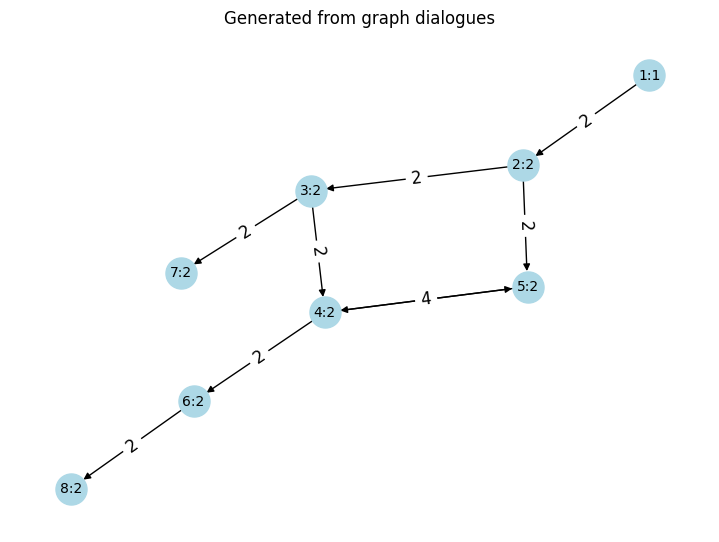

In [40]:
res_graph.visualise_short("Generated from graph dialogues")

In [24]:
from dialogue2graph.metrics.llm_metrics import compare_graphs

In [25]:
compare_graphs(res_graph,Graph(graph_example))

{'value': False, 'description': 'Numbers of nodes do not match: 12 != 11'}

In [41]:
compare_graphs(res_graph,graph_c)

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: BAAI/bge-m3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

{'value': True,
 'description': 'Nodes similarity: 0.9999998807907104, Nodes+edges similarity: 0.9728733897209167'}

In [15]:
from dialogue2graph.metrics.no_llm_metrics import dg_triplets_match

In [21]:
dg_triplets_match(Graph(graph_c), dias)

Graph has all the dialogues


{'value': True}

In [17]:
dias = sampler.invoke(Graph(graph_example),5)

ENDS:  [9]
NODES:  [[1, 2, 5, 10, 11, 6, 7, 9], [1, 5, 10, 11, 6, 7, 9], [1, 2, 5, 7, 9], [1, 3, 8, 9], [1, 4, 8, 9], [1, 5, 7, 9]]
REM:  [[1, 5, 10, 11, 6, 7, 9], [1, 2, 5, 7, 9], [1, 3, 8, 9], [1, 4, 8, 9]]
Graph has all the dialogues


In [19]:
dg_triplets_match(Graph(graph_c), dias)

{'value': False,
 'description': 'Triplets missing in dialogues',
 'absent_triplets': [{'source': "here's the restaurant's info: 32 main street, 555-6789. need anything else?",
   'edge': "no, that's all i needed. thanks!",
   'target': 'alright, have a great meal!'},
  {'source': "here's the restaurant's info: 32 main street, 555-6789. need anything else?",
   'edge': "no, that's all i needed. thanks!",
   'target': 'thanks for reaching out. have a great day!'},
  {'source': 'no problem! what would you like to change about the reservation?',
   'edge': 'can we do 6:30 instead of 7?',
   'target': 'got it. how many people will it be, and what time are you thinking?'},
  {'source': 'hey there! how can i help you today?',
   'edge': 'nevermind, i changed my mind.',
   'target': 'thanks for reaching out. have a great day!'},
  {'source': 'hey there! how can i help you today?',
   'edge': 'nevermind, i changed my mind.',
   'target': 'alright, have a great meal!'},
  {'source': "you're all

In [22]:
from dialogue2graph.metrics.no_llm_metrics import dialogues_are_valid_paths

In [23]:
dialogues_are_valid_paths(Graph(graph_c), dias)

{'value': True}

In [24]:
dias = sampler.invoke(Graph(graph_example),5)

ENDS:  [9]
NODES:  [[1, 2, 5, 10, 11, 6, 7, 9], [1, 5, 10, 11, 6, 7, 9], [1, 2, 5, 7, 9], [1, 3, 8, 9], [1, 4, 8, 9], [1, 5, 7, 9]]
REM:  [[1, 5, 10, 11, 6, 7, 9], [1, 2, 5, 7, 9], [1, 3, 8, 9], [1, 4, 8, 9]]
Graph has all the dialogues


In [25]:
dialogues_are_valid_paths(Graph(graph_c), dias)

{'value': False,
 'invalid_transitions': [{'from_message': 'Hello! How can I help you?',
   'to_message': 'I am looking for a restaurant. The restaurant should be in the moderate price range and should be in the east',
   'dialogue_id': ''},
  {'from_message': 'I am looking for a restaurant. The restaurant should be in the moderate price range and should be in the east',
   'to_message': 'Try curry prince or pizza hut fen ditton',
   'dialogue_id': ''},
  {'from_message': 'Try curry prince or pizza hut fen ditton',
   'to_message': 'The restaurant should serve italian food.',
   'dialogue_id': ''},
  {'from_message': 'The restaurant should serve italian food.',
   'to_message': 'Pizza hut fen ditton serves italian food in the east, would you like a reservation?',
   'dialogue_id': ''},
  {'from_message': 'Pizza hut fen ditton serves italian food in the east, would you like a reservation?',
   'to_message': 'What other restaurants in that area serve Italian food?',
   'dialogue_id': ''}